In [11]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)

In [3]:
df_train.shape

(60000, 785)

In [4]:
28 * 28

784

In [23]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [24]:
df_test.shape

(10000, 785)

In [8]:
df_train.iloc[0,1:].values.reshape((28, 28)).shape

(28, 28)

In [29]:
X_train = df_train.iloc[:, 1:].values/255
y_train = df_train.iloc[:, 0].values

In [30]:
X_test = df_test.iloc[:, 1:].values/255
y_test = df_test.iloc[:, 0].values

(array([38847859.,   571880.,   514157.,   438029.,   446644.,   518761.,
          454060.,   518723.,   611860.,  4118027.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

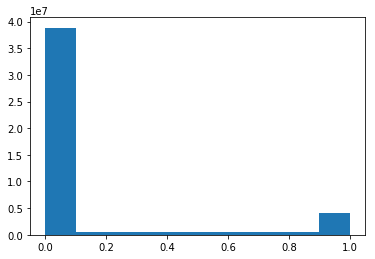

In [31]:
plt.hist(X_train.flatten())

In [9]:
img= df_train.iloc[0,1:].values.reshape((28, 28))

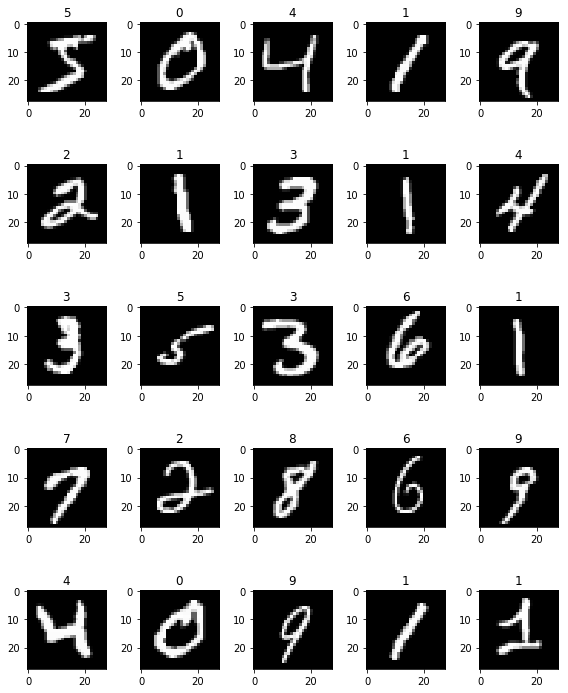

In [22]:
fig, axes = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    img = X_train[i].reshape((28, 28))
    ax.imshow(img, cmap="gray")
    ax.set_title(y_train[i])
plt.tight_layout()

In [32]:
from sklearn import *

In [65]:
%%time
est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15, loss = "log",  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
print("accuracy", est.score(X_test, y_test), "iterations:", est.n_iter_)

accuracy 0.8984 iterations: 100
CPU times: user 1min 17s, sys: 148 ms, total: 1min 18s
Wall time: 22.9 s


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [36]:
est.score(X_test, y_test)

0.9092

In [37]:
y_test_pred = est.predict(X_test)

In [38]:
y_test_pred

array([7, 2, 1, ..., 4, 8, 6])

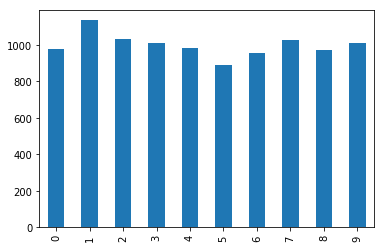

In [42]:
pd.Series(y_test).value_counts().sort_index().plot.bar()

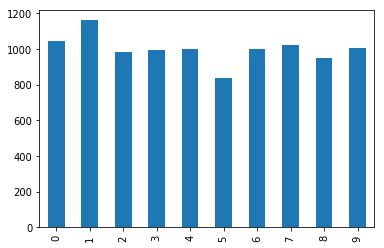

In [43]:
pd.Series(y_test_pred).value_counts().sort_index().plot.bar()

In [44]:
result = pd.DataFrame(dict(actual=y_test, prediction = y_test_pred))

In [45]:
result["match"] = result.actual == result.prediction

In [49]:
errors = result[~result.match]
errors.head()

,actual,prediction,match
8,5,6,False
33,4,6,False
63,3,2,False
66,6,7,False
77,2,7,False


In [54]:
error_matrix = errors.groupby(["actual", "prediction"])["match"].count().unstack()
error_matrix

prediction,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,NaN,NaN,1.0,1.0,NaN,2.0,8.0,1.0,2.0,NaN
1,NaN,NaN,3.0,2.0,NaN,1.0,5.0,1.0,16.0,NaN
2,12.0,6.0,NaN,15.0,14.0,1.0,15.0,18.0,34.0,9.0
3,5.0,2.0,22.0,NaN,1.0,22.0,5.0,14.0,18.0,10.0
4,1.0,7.0,4.0,NaN,NaN,1.0,14.0,1.0,10.0,50.0
5,18.0,3.0,2.0,32.0,16.0,NaN,25.0,10.0,28.0,10.0
6,10.0,3.0,3.0,1.0,8.0,13.0,NaN,2.0,3.0,NaN
7,5.0,15.0,24.0,3.0,9.0,NaN,2.0,NaN,1.0,32.0
8,16.0,11.0,12.0,16.0,16.0,36.0,13.0,13.0,NaN,14.0


In [55]:
import seaborn as sns

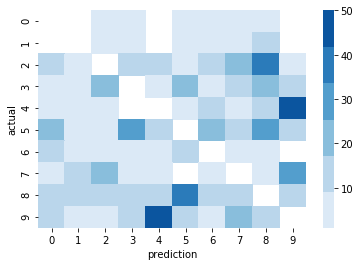

In [57]:
sns.heatmap(error_matrix, cmap=sns.color_palette("Blues"))

In [58]:
wrong_indices = result[~result.match].index

In [61]:
len(wrong_indices)

908

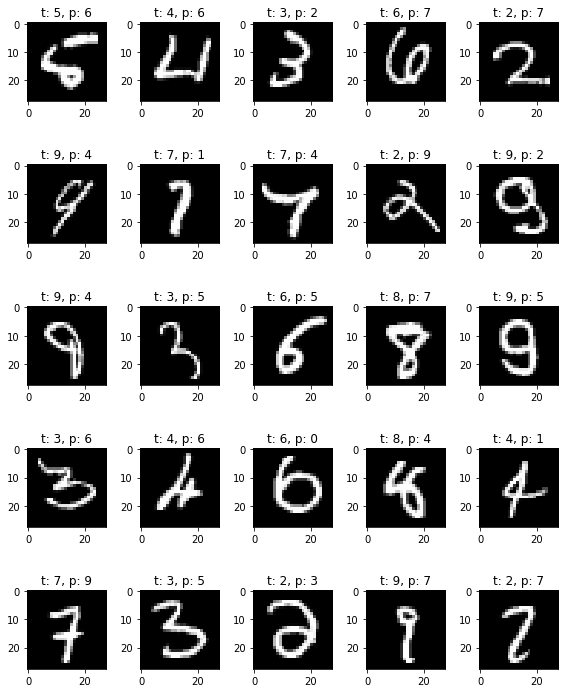

In [60]:
fig, axes = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    img = X_test[wrong_indices][i].reshape((28, 28))
    ax.imshow(img, cmap="gray")
    ax.set_title("t: %d, p: %d"  % (y_test[wrong_indices][i], y_test_pred[wrong_indices][i]))
plt.tight_layout()

In [66]:
y_test_prob = est.predict_proba(X_test)

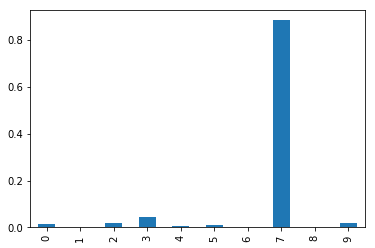

In [69]:
pd.Series(y_test_prob[0]).plot.bar()

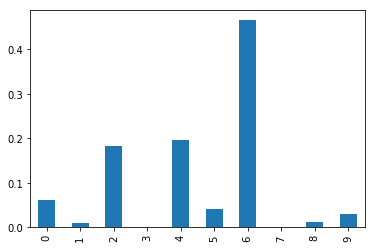

In [70]:
pd.Series(y_test_prob[wrong_indices][0]).plot.bar()

In [71]:
y_test_prob[wrong_indices][0].max()

0.46540614674424413

In [73]:
est.coef_.shape

(10, 784)

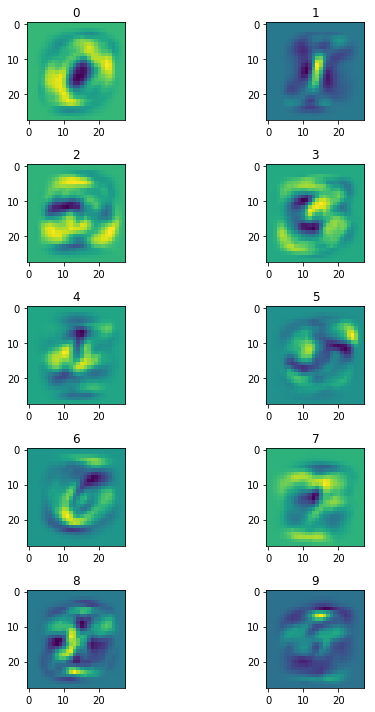

In [76]:
fig, axes = plt.subplots(5, 2, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    img = est.coef_[i].reshape((28, 28))
    ax.imshow(img)
    ax.set_title(i)
plt.tight_layout()

In [78]:
pd.DataFrame(est.coef_[0].reshape((28, 28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.486323e-07,-6.715547e-07,-0.000012,-0.000034,-0.000091,-0.000260,...,-0.000452,-0.000372,-0.000330,-0.000181,-0.000057,-0.000002,0.000000,0.000000,0.000000e+00,0.000000
2,0.000000e+00,0.000000e+00,-0.000002,0.000044,-3.653135e-06,-8.651199e-05,-0.000776,-0.000927,-0.001889,-0.004998,...,-0.028264,-0.023428,-0.015863,-0.007745,-0.003712,-0.001382,-0.000476,-0.000046,0.000000e+00,0.000000
3,0.000000e+00,0.000000e+00,-0.000005,-0.000046,-2.590204e-04,-1.944927e-03,-0.003762,-0.005822,-0.009079,-0.019745,...,-0.084071,-0.068725,-0.049292,-0.031362,-0.017679,-0.006752,-0.002144,-0.000792,-1.559518e-04,0.000000
4,0.000000e+00,-4.267862e-07,-0.000018,-0.000101,-8.661487e-04,-5.712298e-03,-0.011315,-0.019454,-0.030090,-0.043969,...,-0.042648,-0.039275,-0.036041,-0.033771,-0.027929,-0.020034,-0.011869,-0.003667,-5.872837e-04,-0.000012
5,0.000000e+00,0.000000e+00,-0.000160,-0.000272,-3.222489e-03,-1.338643e-02,-0.022773,-0.042020,-0.061852,-0.076204,...,0.035057,0.007822,-0.018757,-0.030390,-0.036568,-0.042607,-0.032265,-0.012306,-2.848577e-03,-0.000352
6,0.000000e+00,-7.061042e-07,-0.000169,-0.001015,-7.009961e-03,-1.785859e-02,-0.034061,-0.056889,-0.078651,-0.088450,...,0.088205,0.048850,0.012714,0.001526,-0.019867,-0.051069,-0.056321,-0.027891,-7.935878e-03,-0.001235
7,-3.471999e-07,-8.287048e-05,-0.000850,-0.002917,-1.388257e-02,-2.564009e-02,-0.044226,-0.066413,-0.078516,-0.053655,...,0.117342,0.068009,0.023239,0.001254,-0.009749,-0.041532,-0.066386,-0.039477,-1.031507e-02,-0.000416
8,3.264329e-04,-1.817477e-04,-0.001925,-0.007800,-2.406989e-02,-4.098340e-02,-0.054509,-0.067064,-0.060319,-0.039827,...,0.112031,0.077714,0.046512,0.016674,0.014525,-0.007144,-0.056011,-0.041010,-9.680180e-03,-0.000636
9,-1.670099e-05,-3.970189e-04,-0.003077,-0.012062,-3.073714e-02,-4.674954e-02,-0.053143,-0.051740,-0.042670,-0.024739,...,0.110669,0.103613,0.077788,0.055509,0.059823,0.045579,-0.022497,-0.031599,-7.733516e-03,-0.000364
